**Гипотеза:**

Земные гамма-вспышки, как и обычные молнии, происходят обычно вблизи береговой линии, т.е. вероятность появления их в условленном интервале( +-500км от береговой линии) выше, чем при их равномерном распределении в широтах (-60, 60)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.stats import norm
import pandas as pd
import geopandas as gpd

In [2]:
# Долгота 0, широта 1

#Для мира
World = np.loadtxt("../workspace_files/TGF_World.txt")
coast_line = np.loadtxt('../workspace_files/coast_line.txt')

#Для Африки отдельно
Africa = World[World[:, 0]>=-30, :]
Africa=Africa[Africa[:, 0]<=60, :]

coast_Africa = coast_line[coast_line[:, 0] >= -30, :]
coast_Africa = coast_Africa[coast_Africa[:, 0] <= 60, :]

#Равномерное распределенние гамма-вспышек
Uniform = np.array([[np.random.uniform() * 180 - 360, 90 - (np.random.uniform() * 60 - 120)] for _ in range(4000)])

r = 6371  # Earth radius(km)

In [3]:
#World
theta_cost, phi_cost = np.radians(coast_line[:, 0]+180), np.radians(90-coast_line[:, 1])
theta_world, phi_world = np.radians(World[:, 0] + 180), np.radians(90 - World[:, 1])

y_cost = r * np.sin(theta_cost) * np.sin(phi_cost)
z_cost = r * np.sin(theta_cost) * np.cos(phi_cost)
x_cost= r * np.cos(theta_cost)

cost_coords = np.concatenate((x_cost.reshape(-1, 1), y_cost.reshape(-1, 1), z_cost.reshape(-1, 1)), axis=1)

y_world = r * np.sin(theta_world ) * np.sin(phi_world )
z_world  = r * np.sin(theta_world ) * np.cos(phi_world )
x_world  = r * np.cos(theta_world )

tgf_world_coords = np.concatenate((x_world.reshape(-1, 1), y_world.reshape(-1, 1), z_world.reshape(-1, 1)), axis=1)
min_tfg_dist_world = distance.cdist(tgf_world_coords, cost_coords).min(axis=1)

In [4]:
#Africa
theta_cost_Africa, phi_cost_Africa = np.radians(coast_Africa[:, 0] + 180), np.radians(90 - coast_Africa[:, 1])
theta_Africa, phi_Africa= np.radians(Africa[:, 0] + 180), np.radians(90 - Africa[:, 1])

y_cost_Africa = r * np.sin(theta_cost_Africa) * np.sin(phi_cost_Africa)
z_cost_Africa = r * np.sin(theta_cost_Africa) * np.cos(phi_cost_Africa)
x_cost_Africa = r * np.cos(theta_cost_Africa)

cost_coords_Africa = np.concatenate((x_cost_Africa.reshape(-1, 1), y_cost_Africa.reshape(-1, 1), z_cost_Africa.reshape(-1, 1)), axis=1)

y_Africa = r * np.sin(theta_Africa) * np.sin(phi_Africa)
z_Africa = r * np.sin(theta_Africa) * np.cos(phi_Africa)
x_Africa= r * np.cos(theta_Africa)

tgf_Africa_coords = np.concatenate((x_Africa.reshape(-1, 1), y_Africa.reshape(-1, 1), z_Africa.reshape(-1, 1)), axis=1)
min_tfg_dist_Africa = distance.cdist(tgf_Africa_coords, cost_coords_Africa).min(axis=1)

In [5]:
theta_cost, phi_cost = np.radians(coast_line[:, 0] + 180), np.radians(90 - coast_line[:, 1])
theta_uni, phi_uni = np.radians(Uniform[:, 0] + 180), np.radians(90 - Uniform[:, 1])

y_cost = r * np.sin(theta_cost) * np.sin(phi_cost)
z_cost = r * np.sin(theta_cost) * np.cos(phi_cost)
x_cost = r * np.cos(theta_cost)

cost_coords = np.concatenate((x_cost.reshape(-1, 1), y_cost.reshape(-1, 1), z_cost.reshape(-1, 1)), axis=1)

y_uni = r * np.sin(theta_uni ) * np.sin(phi_uni )
z_uni  = r * np.sin(theta_uni ) * np.cos(phi_uni )
x_uni  = r * np.cos(theta_uni )

tgf_uni_coords = np.concatenate((x_uni .reshape(-1, 1), y_uni.reshape(-1, 1), z_uni.reshape(-1, 1)), axis=1)
min_tfg_dist_uni = distance.cdist(tgf_uni_coords, cost_coords).min(axis=1) # Нахождение минимального расстояния до точки побережья


**Распределение числа событий от ближайшего расстояния до береговой линии для мира и Африки**

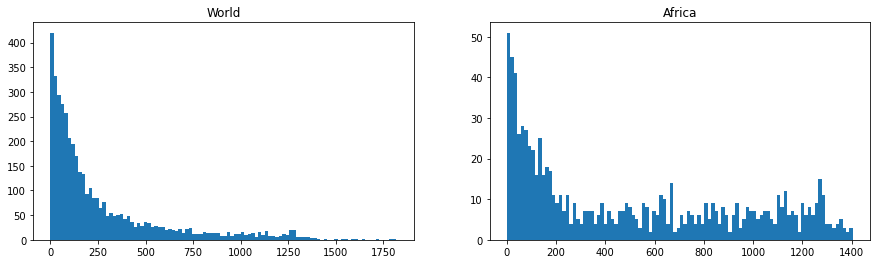

In [6]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
ax[0].set_title("World")
ax[0].hist(min_tfg_dist_world, bins=100)
ax[1].set_title("Africa")
ax[1].hist(min_tfg_dist_Africa, bins=100)

plt.show()

**Распределение земных гаммма-вспышек по поверхности Земли**

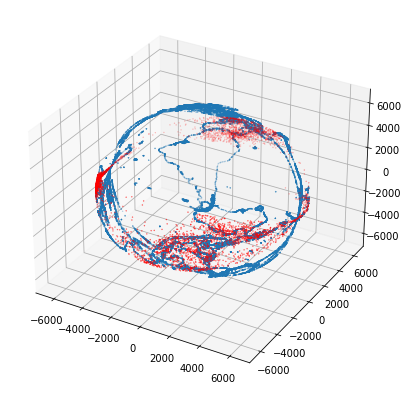

In [7]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_cost, y_cost, z_cost, s=0.1)
ax.scatter(x_world, y_world, z_world, s=0.1, c='r')
plt.show()

In [8]:

Proh_500km_world = min_tfg_dist_world[min_tfg_dist_world < 500].shape[0] / min_tfg_dist_world.shape[0]
print(f"Вероятность возникновения молнии на расстоянии до 500км от побережья (эксперимент)= {Proh_500km_world}")
Proh_500km_uni = min_tfg_dist_uni[min_tfg_dist_uni < 500].shape[0] / min_tfg_dist_uni.shape[0]
print(f"Вероятность возникновения молнии на расстоянии до 500км от побережья (равновероятное распределение) = {Proh_500km_uni}")

Вероятность возникновения молнии на расстоянии до 500км от побережья (эксперимент)= 0.8282950423216445
Вероятность возникновения молнии на расстоянии до 500км от побережья (равновероятное распределение) = 0.5805


**Предварительный вывод:**

По результатам исследования видно, что вероятность возникновения гамма-вспышки возле береговой линии намного больше, чем если бы они были распределены равновероятно, что подтверждает изначальную гипотезу.

**Визуализация данных на картографической проекции**

Визуализируем данные с помощью geopandas

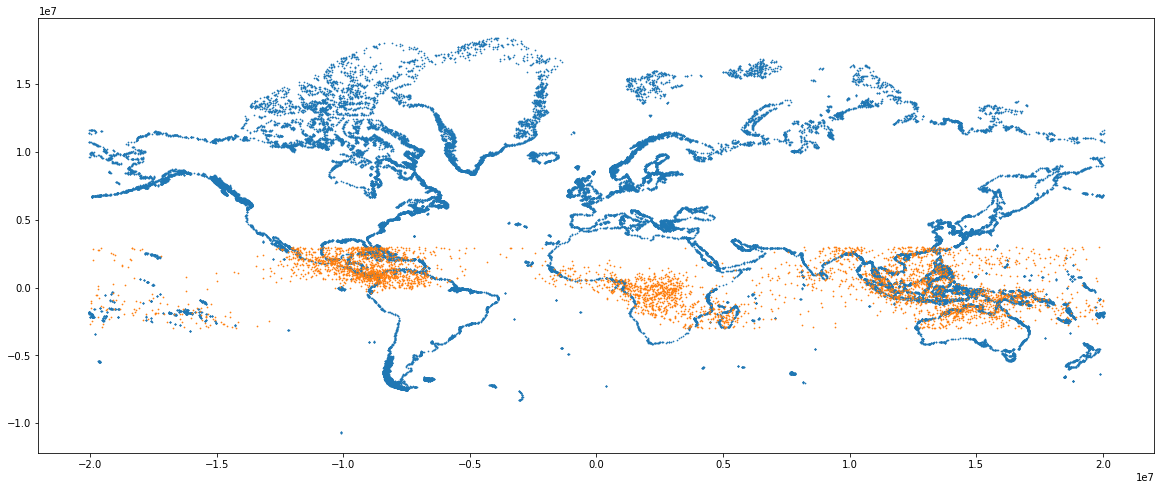

In [9]:
TGF= np.loadtxt("../workspace_files/TGF_World.txt")
coast_line = np.loadtxt('../workspace_files/coast_line.txt')

"""
Переводим данные в декартову систему координат с помощью проекции Меркатора, встроенной в GeoPandas
"""
coast_line_pd = pd.DataFrame(columns=["Longitude", "Latitude"], data=coast_line)
coast_line_world = gpd.GeoDataFrame(coast_line_pd, geometry=gpd.points_from_xy(x = coast_line_pd["Longitude"], y=coast_line_pd["Latitude"]), crs=4326)
coast_line_world = coast_line_world.to_crs(3857)
coords_Mercator_coast_line = np.array(list(map(lambda p: (p.x, p.y), coast_line_world["geometry"])))


tgf_pd = pd.DataFrame(columns=["Longitude", "Latitude"], data=TGF)
tgf_world = gpd.GeoDataFrame(tgf_pd, geometry=gpd.points_from_xy(x = tgf_pd["Longitude"], y=tgf_pd["Latitude"]), crs=4326)
tgf_world = tgf_world.to_crs(3857)
coords_Mercator_tgf= np.array(list(map(lambda p: (p.x, p.y), tgf_world["geometry"])))

plt.figure(figsize=(20, 8))
plt.scatter(coords_Mercator_coast_line[:, 0], coords_Mercator_coast_line[:, 1], s=0.5)
plt.scatter(coords_Mercator_tgf[:, 0], coords_Mercator_tgf[:, 1], s=0.5)

Теперь попробуем кластеризовать континенты и острова, построить на их основе полигоны и определить сумму этих полигонов как сушу.

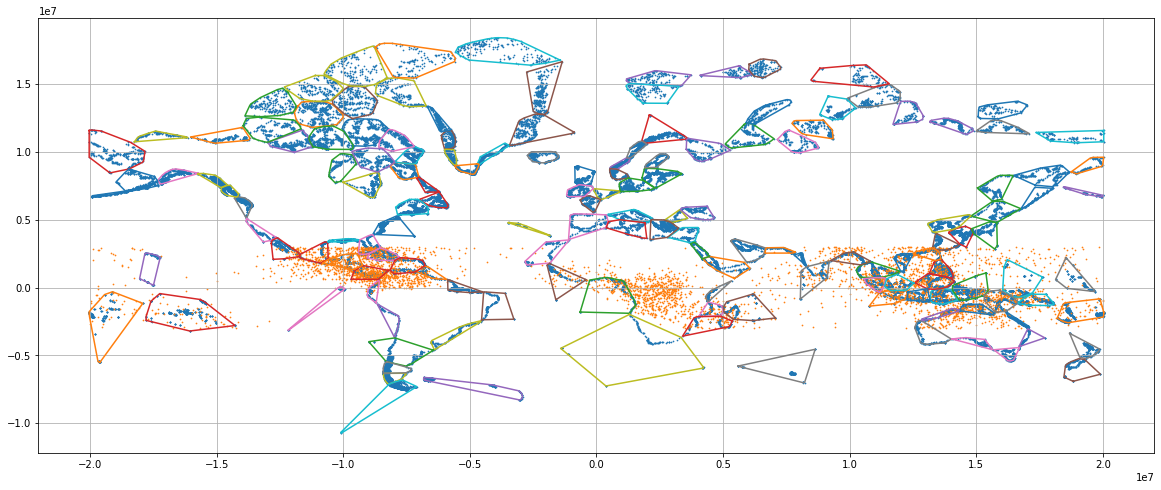

In [10]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, OPTICS, SpectralClustering
from scipy.spatial import ConvexHull
count_areas =150
from shapely import Polygon, MultiPolygon, Point


clustering = MiniBatchKMeans(n_clusters=count_areas, n_init='auto').fit(coords_Mercator_coast_line)

group_points = [[] for _ in range(len(set(clustering.labels_)))]
for i, l in enumerate(clustering.labels_):
    group_points[l].append(coords_Mercator_coast_line[i])
group_points = [np.array(el) for el in group_points]

boundaries = [ConvexHull(group) for group in group_points]
polygons = [[] for _ in range(len(boundaries))]

for b, boundary in enumerate(boundaries):
    for idx in boundary.vertices:
        polygons[b].append(group_points[b][idx])

polys = [Polygon(poly) for poly in polygons]

plt.figure(figsize=(20, 8))
plt.scatter(coords_Mercator_coast_line[:, 0], coords_Mercator_coast_line[:, 1], s=0.5)
plt.scatter(coords_Mercator_tgf[:, 0], coords_Mercator_tgf[:, 1], s=0.5)

for p in polys:
    x, y = p.exterior.xy
    plt.plot(x, y)
plt.grid(visible=True)

Как видно, контурное расположение плохо поддаётся адекватной кластеризации, что для всей карты, что для суши в границах +-30 градусов от экватора. Для решения это проблемы было сделано следующее - карта была отредактированная как изображение, на ней были "заполнены" континенты и убраны совсем маленькие острова. Далее изображение было считано как массив пикселей RGBA, те точки, которые не соответствовали белому цвету, попали в новый массив координат суши (х, у), далее координаты были пронормированы в соответствии с исходными.

In [11]:
from PIL import Image
img = Image.open("../workspace_files/maint_land_mercator.png")
np_img = np.array(img)
np_img = np.sum(np_img[:,:,:3], axis=2)
np_img=np.where(np_img<760, np_img, 0)
rows, cols = np_img.shape
max_x_merc = np.max(coords_Mercator_coast_line[:, 0])
min_x_merc  = np.min(coords_Mercator_coast_line[:, 0])
max_y_merc  = np.max(coords_Mercator_coast_line[:, 1])
#Берём это значение, так как из данных были удалены несколько островов в очень высоких южных широтах
min_y_merc  = list(sorted(coords_Mercator_coast_line[:, 1]))[100]

Размерность полученных координат: (153687, 2)


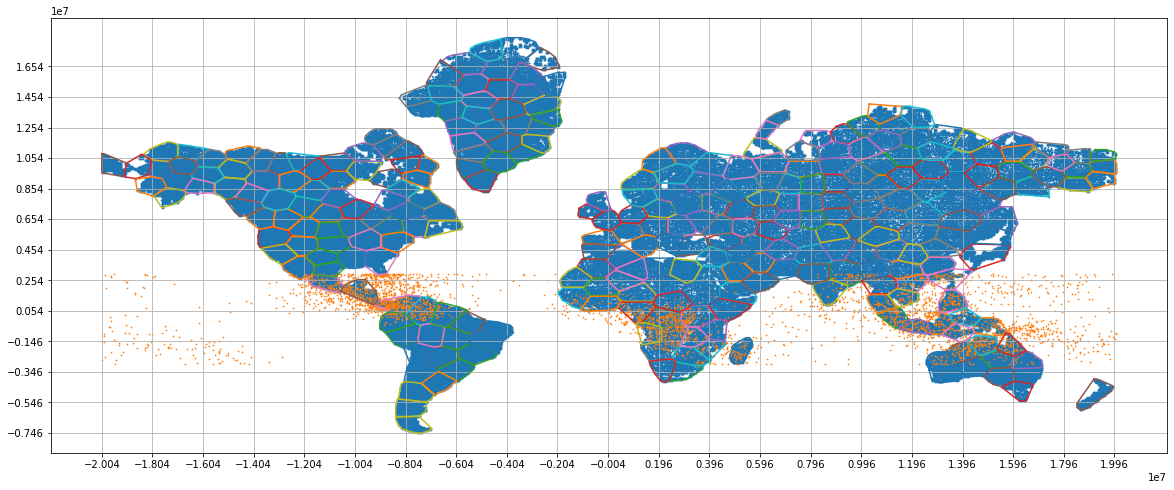

In [12]:
vectorized_img = []
for r in range(rows):
    for c in range(cols):
        if np_img[r][c]!=0:
            vectorized_img.append((c, -r))
vectorized_img = np.array(vectorized_img)

size_x = np.max(vectorized_img[:, 0]) - np.min(vectorized_img[:, 0])
size_y = np.max(vectorized_img[:, 1]) -np.min(vectorized_img[:, 1])
min_x = np.min(vectorized_img[:, 0])
min_y = np.min(vectorized_img[:, 1])

"""Реальные разбросы данных на проекции Меркатора: х(-150, 150), у(120, -140)"""
vectorized_img[:, 0] = ((vectorized_img[:, 0]-min_x-size_x/2)/size_x)*(max_x_merc -min_x_merc )
vectorized_img[:, 1] = ((vectorized_img[:, 1]-min_y-size_y*(abs(min_y_merc /(max_y_merc-min_y_merc) )))/size_y)*(max_y_merc -min_y_merc )
print("Размерность полученных координат:", vectorized_img.shape)

count_areas =300
clustering = MiniBatchKMeans(n_clusters=count_areas, n_init='auto').fit(vectorized_img)

group_points = [[] for _ in range(len(set(clustering.labels_)))]
for i, l in enumerate(clustering.labels_):
    group_points[l].append(vectorized_img[i])
group_points = [np.array(el) for el in group_points]

boundaries = [ConvexHull(group) for group in group_points]
polygons = [[] for _ in range(len(boundaries))]

for b, boundary in enumerate(boundaries):
    for idx in boundary.vertices:
        polygons[b].append(group_points[b][idx])

polys = [Polygon(poly) for poly in polygons]

plt.figure(figsize=(20, 8))
plt.scatter(vectorized_img[:, 0], vectorized_img[:, 1], s = 0.5)
plt.scatter(coords_Mercator_tgf[:, 0], coords_Mercator_tgf[:, 1], s=0.5)
plt.xticks(range(int(min_x_merc), int(max_x_merc), 2*10**6))
plt.yticks(range(int(min_y_merc), int(max_y_merc), 2*10**6))
for p in polys:
    x, y = p.exterior.xy
    plt.plot(x, y)
plt.grid(visible=True)

Как видно, теперь суша намного лучше поддаётся кластеризации. Составляем из этих кластеров мультиполигон и находим количество точек, попавших на сушу. 

In [13]:

TGF_points = list(map(Point, coords_Mercator_tgf))
multi_poly = MultiPolygon(polys)
TGF_land = list(filter(lambda x:multi_poly.contains(x), TGF_points))
print("Суммарное количество вспышек на Земле: ", len(TGF_points))
print("Количество вспышек над сушей:", len(TGF_land))
print("Относительное число точек над сушей: ", len(TGF_land)/len(TGF_points))

Суммарное количество вспышек на Земле:  4135
Количество вспышек над сушей: 2415
Относительное число точек над сушей:  0.5840386940749698


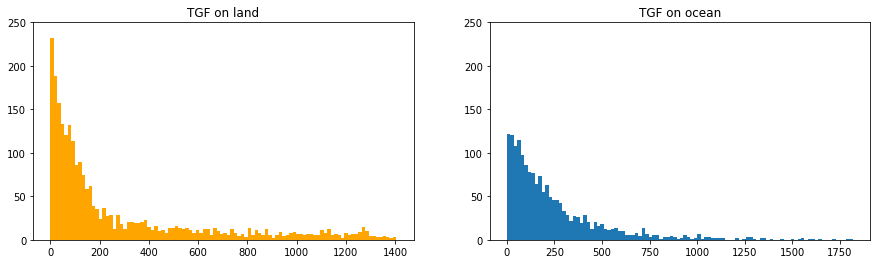

In [21]:
mask_land = [] # маска для точек над землёй
for i, t in enumerate(TGF_points):
    if t in TGF_land:
        mask_land.append(True)
    else:
        mask_land.append(False)

mask_land = np.array(mask_land)

# распредение для вспышек над сушей:
min_tfg_dist_world_land = distance.cdist(tgf_world_coords[mask_land], cost_coords).min(axis=1)

# распределение для вспышек над океаном:
mask_ocean = np.array([not el for el in mask_land])
min_tfg_dist_world_ocean = distance.cdist(tgf_world_coords[mask_ocean], cost_coords).min(axis=1)

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
ax[0].set_title("TGF on land")
ax[0].hist(min_tfg_dist_world_land, bins=100, color ="orange")
ax[0].set_ylim([0, 250])
ax[1].set_title("TGF on ocean")
ax[1].hist(min_tfg_dist_world_ocean, bins=100)
ax[1].set_ylim([0, 250])

plt.show()

In [28]:
Proh_500km_world_land = min_tfg_dist_world_land[min_tfg_dist_world_land < 500].shape[0] / min_tfg_dist_world_land.shape[0]
Proh_500km_world_ocean = min_tfg_dist_world_ocean[min_tfg_dist_world_ocean < 500].shape[0] / min_tfg_dist_world_ocean.shape[0]
print("Частота возникновения гамма-вспышек на расстоянии до 500 км вглубь суши составляет {} от всех вспышек на суше".format(str(Proh_500km_world_land)[:5]))
print("Частота возникновения гамма-вспышек на расстоянии до 500 км вглубь океана составляет {} от всех вспышек в океане".format(str(Proh_500km_world_ocean)[:5]))

Частота возникновения гамма-вспышек на расстоянии до 500 км вглубь суши составляет 0.795 от всех вспышек на суше
Частота возникновения гамма-вспышек на расстоянии до 500 км вглубь океана составляет 0.874 от всех вспышек в океане


**Общий вывод:**

Вероятность возникновения гамма-вспышки возле береговой линии намного больше (p = 0.83), чем если бы они были распределены равновероятно (p = 0.56), что подтверждает изначальную гипотезу.
Число вспышек, случившихся на суше, составляет 0.58 от всех вспышек на Земле.